# โหลดรูปภาพจาก google

## ติดตั้งไลบรารี่ google_images_download

In [0]:
! pip install google_images_download

## โหลดรูปภาพจาก google
ตัวอย่างโหลดรูปภาพสุนัข (Dog)

In [0]:

In [12]:

from google_images_download import google_images_download   #importing the library

response = google_images_download.googleimagesdownload()   #class instantiation

arguments = {"keywords":"dog","limit":5,"print_urls":True}   #creating list of arguments
paths = response.download(arguments)   #passing the arguments to the function
print(paths)   #printing absolute paths of the downloaded images



ตรวจสอบรูปภาพที่ดาวน์โหลด

In [6]:
!ls '/content/downloads/dog'

1.dog-landing-hero-lg.jpg	   3.gettyimages-1094874726.png  5.Mobile.jpg
2.Acute-Dog-Diarrhea-47066074.jpg  4.Collage_of_Nine_Dogs.jpg


# อ่านรูปภาพจากไดเร็กทรอรี่ (Directory)

In [8]:
import os

img_path = '/content/downloads/dog'

files = []
for r, d, f in os.walk(img_path):
    for file in f:
        if (('.png' in file) or ('.jpg' in file)) :
            files.append(os.path.join(r, file))

for f in files:
    print(f)

/content/downloads/dog/2.Acute-Dog-Diarrhea-47066074.jpg
/content/downloads/dog/3.gettyimages-1094874726.png
/content/downloads/dog/1.dog-landing-hero-lg.jpg
/content/downloads/dog/5.Mobile.jpg
/content/downloads/dog/4.Collage_of_Nine_Dogs.jpg


# ฟังก์ชันแสดงรูปภาพ

ตัวอย่างฟังก์ชันแสดงรูปภาพ

In [0]:
import matplotlib.pyplot as plt
from skimage import io
from skimage import transform

def show_image(image_files, fig_row, fig_col):
  try:
    plt.figure(figsize=(8,8))
    for i in range(0, (fig_row * fig_col)):
      plt.subplot(fig_row, fig_col, i+1)

      show_img = io.imread(image_files[i])
      show_img = transform.resize(show_img,(150,150), anti_aliasing=True)
      plt.axis('off')
      plt.imshow(show_img)
    plt.show()
  except:
    pass  

แสดงรูปภาพ

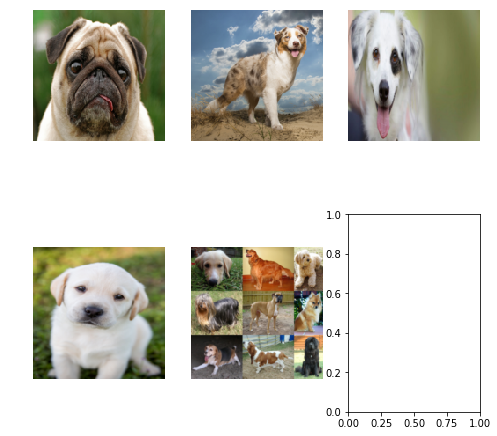

In [63]:
import numpy as np

n_rows = int(np.sqrt(len(files)))
n_cols = int(np.sqrt(len(files)))
show_image(files, n_rows, n_cols+1)

## ฟังก์ชันแปลงรูปภาพเป็นภาพสีเทา (Gray image) และแสดงรูปภาพ

In [0]:
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import transform

def show_gray_image(image_files, fig_row, fig_col):
  try:
    plt.figure(figsize=(8,8))
    for i in range(0, (fig_row * fig_col)):
      plt.subplot(fig_row, fig_col, i+1)

      img = io.imread(image_files[i])
      re_img = transform.resize(img,(150,150), anti_aliasing=True)
      gray_img = color.rgb2gray(re_img)
      
      plt.axis('off')
      plt.gray()
      plt.imshow(gray_img)
    plt.show()
  except:
    pass 

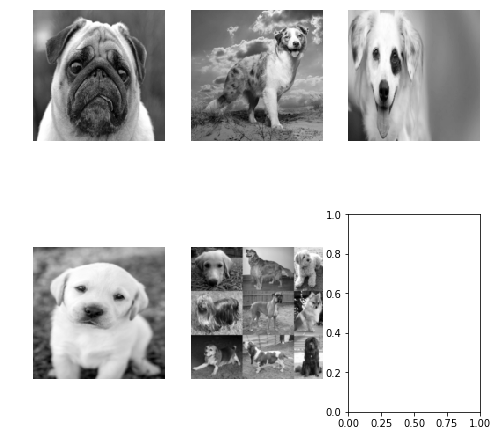

In [70]:
import numpy as np

n_rows = int(np.sqrt(len(files)))
n_cols = int(np.sqrt(len(files)))
show_gray_image(files, n_rows, n_cols+1)

## ฟังก์ชันแปลงรูปภาพเป็นภาพสีขาวดำ (Binary image) และแสดงรูปภาพ

In [0]:
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import transform
from skimage import filters

def show_binary_image(image_files, fig_row, fig_col, inv=False):
  try:
    plt.figure(figsize=(8,8))
    for i in range(0, (fig_row * fig_col)):
      plt.subplot(fig_row, fig_col, i+1)

      img = io.imread(image_files[i])
      re_img = transform.resize(img,(150,150), anti_aliasing=True)
      gray_img = color.rgb2gray(re_img)
      thresh = filters.threshold_otsu(gray_img)
      if(inv == False):
        binary_img = gray_img > thresh
      else:
        binary_img = gray_img < thresh
      
      plt.axis('off')
      plt.imshow(binary_img)
    plt.show()
  except:
    pass 

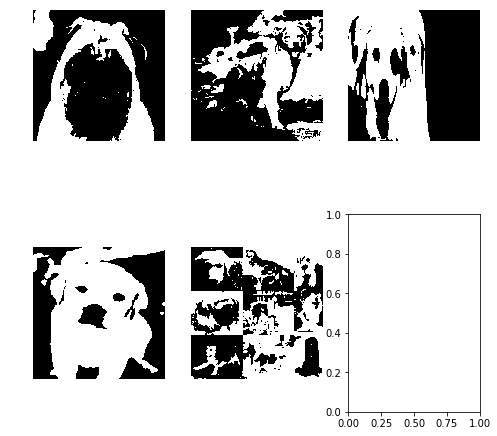

In [96]:
import numpy as np

n_rows = int(np.sqrt(len(files)))
n_cols = int(np.sqrt(len(files)))
show_binary_image(files, n_rows, n_cols+1)

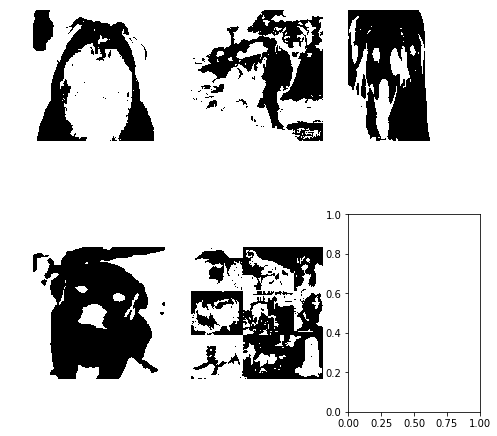

In [84]:
import numpy as np

n_rows = int(np.sqrt(len(files)))
n_cols = int(np.sqrt(len(files)))
show_binary_image(files, n_rows, n_cols+1, inv=True)